# TELECOM CHURN

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Step 1: Importing Libraries

In [362]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## Step 2: Reading and Understanding the Dataset

In [310]:
# to display all rows and columns
pd.set_option('display.max_rows', None, 'display.max_columns', 200)
# reading the dataset
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.3

In [311]:
print('Rows    : ',telecom.shape[0])
print('Columns : ',telecom.shape[1])
print('\nMissing Values : \n',telecom.isnull().sum().values.sum())
print('\n Missing Percentage : \n',telecom.isnull().sum()/len(telecom)*100)

Rows    :  99999
Columns :  226

Missing Values : 
 3594931

 Missing Percentage : 
 mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roa

In [312]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,...,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,9

## Step 3: Preparing the Dataset

In [313]:
#checking out the object columns
telecom_object = telecom.select_dtypes(include='object')
telecom_object.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [314]:
# the dates columns dont seem to be important. Hence dropping them
telecom.drop(telecom_object.columns, axis = 1, inplace = True)
telecom.shape

(99999, 214)

In [315]:
# finding out the unique values in each column so that columns with single values can be removed from the dataset 
telecom.nunique().sort_values()

std_ic_t2o_mou_6          1
std_ic_t2o_mou_9          1
std_og_t2c_mou_9          1
std_og_t2c_mou_8          1
std_og_t2c_mou_7          1
std_og_t2c_mou_6          1
std_ic_t2o_mou_7          1
std_ic_t2o_mou_8          1
loc_ic_t2o_mou            1
std_og_t2o_mou            1
loc_og_t2o_mou            1
circle_id                 1
fb_user_8                 2
fb_user_7                 2
fb_user_6                 2
night_pck_user_9          2
night_pck_user_6          2
night_pck_user_7          2
night_pck_user_8          2
fb_user_9                 2
monthly_2g_6              5
monthly_2g_9              5
monthly_2g_8              6
monthly_2g_7              6
monthly_3g_9             11
monthly_3g_8             12
monthly_3g_6             12
monthly_3g_7             15
sachet_3g_6              25
count_rech_3g_6          25
count_rech_3g_9          27
sachet_3g_7              27
sachet_3g_9              27
count_rech_3g_7          28
sachet_3g_8              29
count_rech_3g_8     

Here we used nunique because we wanted to check the unique value without taking missing value as unique value.

In [316]:
# list of columns to be removed
unwanted_cols = [c for c in telecom.columns if len(telecom[c].unique()) < 3] 
# dropping the unwanted columns
telecom.drop(unwanted_cols, axis = 1, inplace = True)
telecom.shape

(99999, 202)

Now here, we are using unique() and it will take missing value as another unique value. So, we are removing the variables
which have unique value less than 3, we took 3 because unqiue() will take 1 unique value as a missing value. For that
this code will delete the variable which have only 1 value in whole variable.

In [317]:
# checking out the missing value % in each column 
miss_val = (telecom.isnull().sum()/len(telecom)*100).sort_values(ascending = False)
print('Columns having missing value:',miss_val[miss_val>0].shape[0])
print(miss_val[miss_val>0])

Columns having missing value: 144
count_rech_3g_6       74.846748
max_rech_data_6       74.846748
av_rech_amt_data_6    74.846748
total_rech_data_6     74.846748
night_pck_user_6      74.846748
arpu_2g_6             74.846748
fb_user_6             74.846748
count_rech_2g_6       74.846748
arpu_3g_6             74.846748
total_rech_data_7     74.428744
arpu_2g_7             74.428744
arpu_3g_7             74.428744
max_rech_data_7       74.428744
count_rech_3g_7       74.428744
count_rech_2g_7       74.428744
fb_user_7             74.428744
av_rech_amt_data_7    74.428744
night_pck_user_7      74.428744
max_rech_data_9       74.077741
arpu_3g_9             74.077741
count_rech_2g_9       74.077741
arpu_2g_9             74.077741
av_rech_amt_data_9    74.077741
count_rech_3g_9       74.077741
night_pck_user_9      74.077741
total_rech_data_9     74.077741
fb_user_9             74.077741
arpu_3g_8             73.660737
av_rech_amt_data_8    73.660737
fb_user_8             73.660737
count_

Here if you can see above all the above 70% missing value variables are related to Internet recharge or usage. 
The insight we get from this is that, this is not a missing value but there is no recharge has been done or no internet usage has been done.
So instead of removing this variables, replace the missing value with 0, assuming that the no recharge or usage has been done. 

In [318]:
for i in miss_val[miss_val>70].index.tolist():
    telecom[i].fillna(0,inplace = True)

In [319]:
telecom.shape

(99999, 202)

### Filtering and Tagging Data

Creating columns to find out the total recharge amounts (data and calls) for the months of june and july so as to   filter the dataset for customers above the 70th percentile of total recharge amount

In [320]:
# creating column 'total_rech_amt_d_6' to calculate total amount spent on data for june
telecom['total_rech_amt_d_6'] = telecom['total_rech_data_6']*telecom['av_rech_amt_data_6']
# creating column 'total_rech_amt_c&d_6' to calculate total amount spent on data and calls for june
telecom['total_rech_amt_c&d_6'] =  telecom[['total_rech_amt_6', 'total_rech_amt_d_6']].sum(axis=1) 
# creating column 'total_rech_amt_d_7' to calculate total amount spent on data for july
telecom['total_rech_amt_d_7'] = telecom['total_rech_data_7']*telecom['av_rech_amt_data_7']
# creating column 'total_rech_amt_c&d_7' to calculate total amount spent on data and calls for july
telecom['total_rech_amt_c&d_7'] =  telecom[['total_rech_amt_7', 'total_rech_amt_d_7']].sum(axis=1)  
# creating column 'total_rech_amt_c&d_6&7' which is the average of the total recharge amounts for the months of june and july
telecom['total_rech_amt_c&d_6&7'] = telecom[['total_rech_amt_c&d_6', 'total_rech_amt_c&d_7']].mean(axis=1)     
# dropping the redundant columns
telecom.drop(['total_rech_amt_c&d_6', 'total_rech_amt_c&d_7', 'total_rech_data_6', 'total_rech_data_7', 
              'av_rech_amt_data_6', 'av_rech_amt_data_7',], axis = 1, inplace = True)

In [321]:
# filtering the dataframe for only those users who recharged with an amount more than or equal to the 70th percentile of the average recharge amount in the first two months
telecom = telecom[telecom['total_rech_amt_c&d_6&7']>=np.percentile(telecom['total_rech_amt_c&d_6&7'], 70)]

In [322]:
telecom.shape

(30001, 201)

In [323]:
# creating the target variable 'churn' based on zero usage of calls and data for the 9th month and converting it to type int
telecom['churn'] = np.where(telecom.eval("total_ic_mou_9 == 0 and total_og_mou_9 == 0 and vol_2g_mb_9 == 0 and vol_3g_mb_9 == 0"),'1', '0')
telecom['churn'] = telecom['churn'].astype(int)

In [324]:
# % of churn
churn = (sum(telecom['churn'])/len(telecom['churn'].index))*100
churn

8.136395453484884

In [325]:
# dropping all columns related to churn
telecom = telecom.drop([x for x in telecom if x.endswith('_9')], 1)
telecom = telecom.drop([x for x in telecom if x.startswith('sep_')], 1)

In [326]:
telecom.shape

(30001, 152)

### Missing value treatment

In [327]:
# finding out the missing values in the new dataset obtained after filtering
(telecom.isnull().sum()/len(telecom)*100).sort_values(ascending = False)

std_ic_t2f_mou_8          3.913203
loc_ic_t2t_mou_8          3.913203
loc_og_t2c_mou_8          3.913203
loc_og_mou_8              3.913203
std_og_t2t_mou_8          3.913203
std_og_t2m_mou_8          3.913203
std_og_t2f_mou_8          3.913203
isd_og_mou_8              3.913203
spl_og_mou_8              3.913203
og_others_8               3.913203
ic_others_8               3.913203
loc_og_t2m_mou_8          3.913203
isd_ic_mou_8              3.913203
spl_ic_mou_8              3.913203
loc_ic_t2m_mou_8          3.913203
std_ic_mou_8              3.913203
loc_ic_t2f_mou_8          3.913203
std_ic_t2m_mou_8          3.913203
std_ic_t2t_mou_8          3.913203
loc_ic_mou_8              3.913203
loc_og_t2f_mou_8          3.913203
std_og_mou_8              3.913203
onnet_mou_8               3.913203
offnet_mou_8              3.913203
roam_og_mou_8             3.913203
loc_og_t2t_mou_8          3.913203
roam_ic_mou_8             3.913203
loc_ic_mou_6              1.816606
roam_og_mou_6       

In [328]:
telecom.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_d_6,total_rech_amt_d_7,total_rech_amt_c&d_6&7,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3000

Here if we used median and not mean because, mean values are actually very much near to the 75% percentie value.

In [329]:
telecom = telecom.fillna(telecom.median()).fillna(telecom.mode().iloc[0])

### Feature extraction

Creating columns which are average of both 6 and 7 month and dropping the redundant columns.

In [330]:
telecom['arpu_6&7'] =  telecom[['arpu_6', 'arpu_7']].mean(axis=1)  

In [331]:
telecom['total_rech_amt_d_6&7'] = telecom[['total_rech_amt_d_6', 'total_rech_amt_d_7']].mean(axis=1)
telecom['total_rech_amt_6&7'] = telecom[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)

Creating the total_ic_ column which is a sum of the minutes of usage (MOU) of all the incoming calls

In [332]:
telecom['total_ic_8'] = telecom[[x for x in telecom if 'ic_' in x and x.endswith('_8')]].sum(axis = 1)
telecom['total_ic_6'] = telecom[[x for x in telecom if 'ic_' in x and x.endswith('_6')]].sum(axis = 1)
telecom['total_ic_7'] = telecom[[x for x in telecom if 'ic_' in x and x.endswith('_7')]].sum(axis = 1)
telecom['total_ic_6&7'] = telecom[['total_ic_6', 'total_ic_7']].mean(axis=1)

Creating the 'total_og_' column which is a sum of the minutes of usage (MOU) of all the outgoing calls

In [333]:
telecom['total_og_8'] = telecom[[x for x in telecom if 'og_' in x and x.endswith('_8')]].sum(axis = 1)
telecom['total_og_6'] = telecom[[x for x in telecom if 'og_' in x and x.endswith('_6')]].sum(axis = 1)
telecom['total_og_7'] = telecom[[x for x in telecom if 'og_' in x and x.endswith('_7')]].sum(axis = 1)
telecom['total_og_6&7'] = telecom[['total_og_6', 'total_og_7']].mean(axis=1)

In [334]:
# dropping all the redundant columns
telecom.drop(['arpu_6','arpu_7','total_rech_amt_d_6','total_rech_amt_d_7','total_ic_6','total_ic_7','total_og_6','total_og_7'], axis = 1, inplace = True)

#dropping mobile number as it is not useful for data analysis
telecom.drop(['mobile_number'],axis=1, inplace = True)

In [335]:
# calculating the total amount spent on data for the 8th month
telecom['total_rech_amt_d_8'] = telecom['total_rech_data_8']*telecom['av_rech_amt_data_8']
# calculating the total amount spent on data and calls for the 8th month
telecom['total_rech_amt_c&d_8'] =  telecom[['total_rech_amt_8', 'total_rech_amt_d_8']].sum(axis=1) 
# dropping the redundant columns
telecom.drop(['total_rech_data_8', 'av_rech_amt_data_8'], axis = 1, inplace = True)

Creating new columns which are a difference of the average of months 6 and 7 and month 8

In [336]:
telecom['arpu_diff'] = telecom['arpu_6&7'] - telecom['arpu_8']
telecom['total_rech_amt_d_diff'] = telecom['total_rech_amt_d_6&7'] - telecom['total_rech_amt_d_8']
telecom['total_rech_amt_diff'] = telecom['total_rech_amt_6&7'] - telecom['total_rech_amt_8']
telecom['total_rech_amt_c&d_diff'] = telecom['total_rech_amt_c&d_6&7'] - telecom['total_rech_amt_c&d_8']
telecom['total_ic_diff'] = telecom['total_ic_6&7'] - telecom['total_ic_8']
telecom['total_og_diff'] = telecom['total_og_6&7'] - telecom['total_og_8']

In [337]:
telecom.shape

(30001, 160)

## Step 4: Data Analysis

### Univariate Analysis

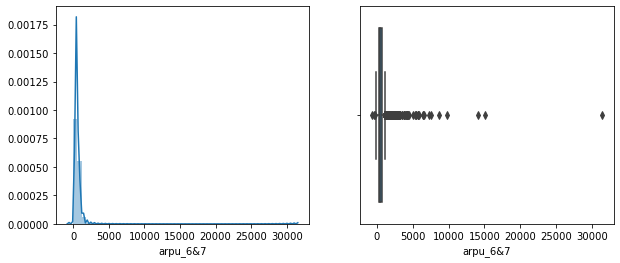

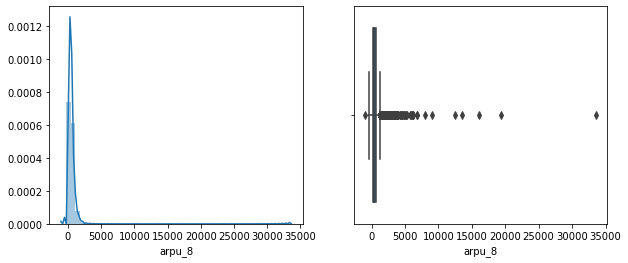

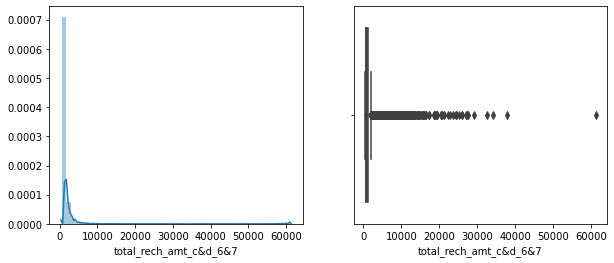

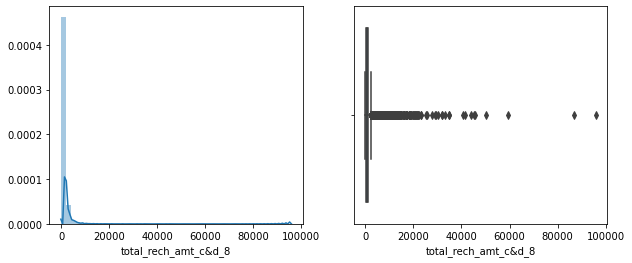

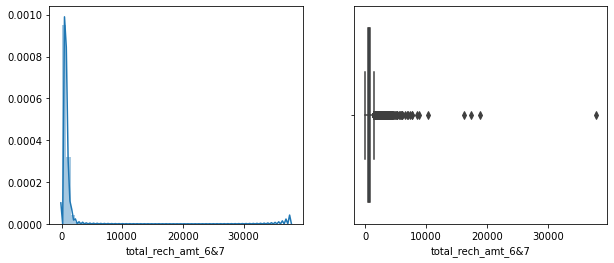

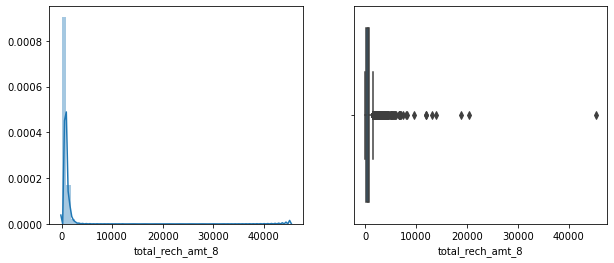

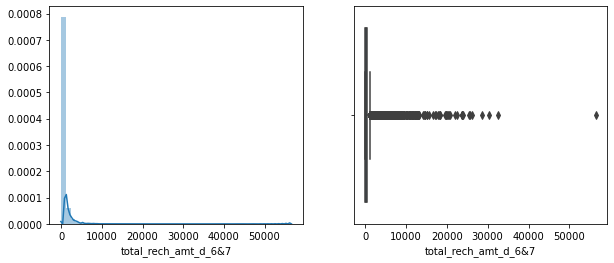

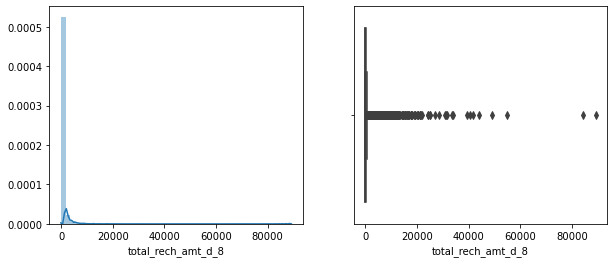

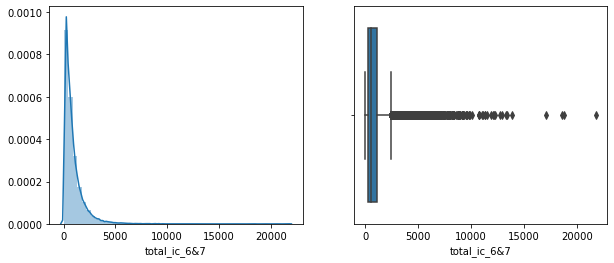

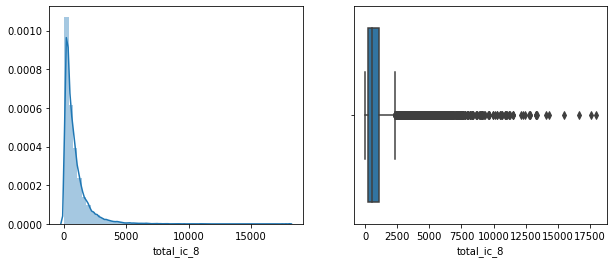

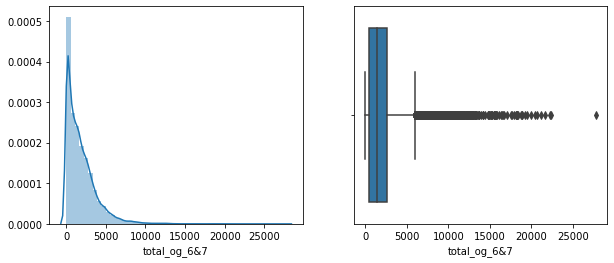

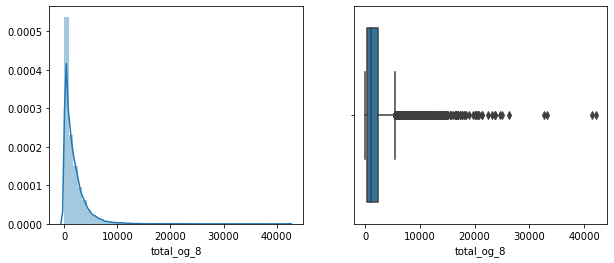

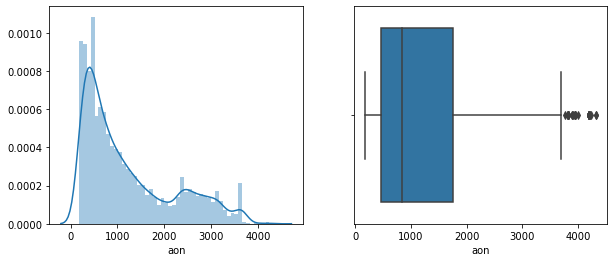

In [338]:
#plotting the distribution and boxplots
for c in ['arpu_6&7', 'arpu_8', 'total_rech_amt_c&d_6&7', 'total_rech_amt_c&d_8', 'total_rech_amt_6&7', 'total_rech_amt_8',
          'total_rech_amt_d_6&7', 'total_rech_amt_d_8', 'total_ic_6&7','total_ic_8', 'total_og_6&7', 'total_og_8', 'aon']:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(telecom[c])
    plt.subplot(1, 2, 2)
    sns.boxplot(telecom[c])
    plt.show()

From the above plots it is evident that the data has many outliers, which will be treated later by scaling them.

### Bivariate Analysis

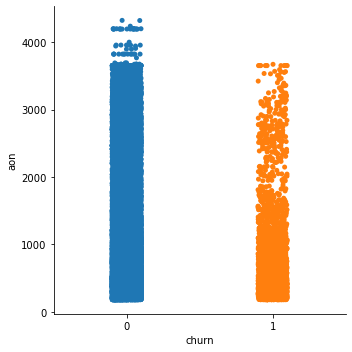

In [339]:
sns.catplot(x="churn", y='aon', data=telecom) 

From the above analysis it is clear that the churn rate for older customers are lower than for newer customers.

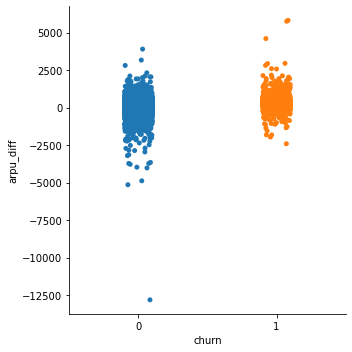

In [340]:
sns.catplot(x="churn", y='arpu_diff', data=telecom) 

From the above analysis we can see that for churners,  the arpu is lower for the 8th month than the 6th and 7th months.

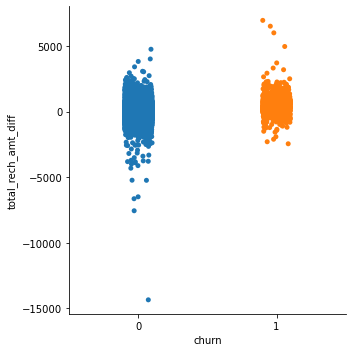

In [341]:
sns.catplot(x="churn", y='total_rech_amt_diff', data=telecom) 

From the above analysis we can see that for churners,  the total recharge amount is lower for the 8th month than the
6th and 7th months.

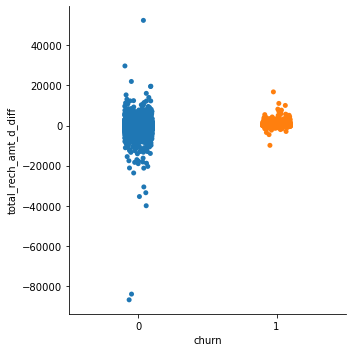

In [342]:
sns.catplot(x="churn", y='total_rech_amt_d_diff', data=telecom) 

From the above analysis we can see that for churners, the arpu is lower for the 8th month than the 6th and 7th months.

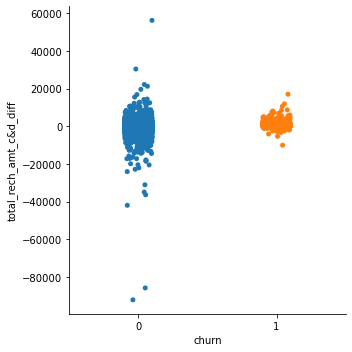

In [343]:
sns.catplot(x="churn", y='total_rech_amt_c&d_diff', data=telecom) 

From the above analysis we can see that for churners, the total amount spent on calls and data are significantly 
lower for the 8th month than the 6th and 7th months.

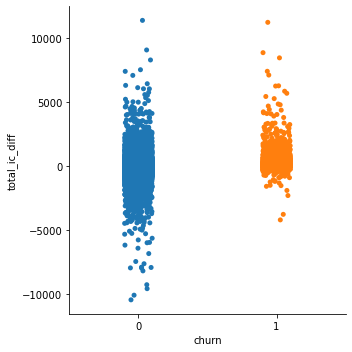

In [344]:
sns.catplot(x="churn", y='total_ic_diff', data=telecom) 

From the above analysis we can see that the amount of total incoming calls are less in the 8th month for those
who churned.

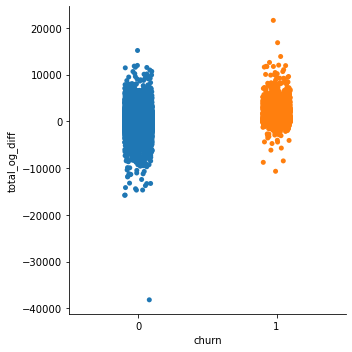

In [345]:
sns.catplot(x="churn", y='total_og_diff', data=telecom) 

From the above analysis we can see that the total no of outgoing calls for the 8th month are considerably lower for the churners than in the
6th and 7th months.

## Step 5: Building Models

### Dividing into X and y sets for model building.

In [346]:
# Putting feature variable to X
X = telecom.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom['churn']

In [347]:
#finding out the categorical columns so that they can be removed to get the numerical columns which need to be scaled
cat_vars = [x for x in X if x.startswith('night_pck_user') or x.startswith('fb_user')]
num_vars = [x for x in X.columns if x not in cat_vars]

### Splitting the train and test data.

In [348]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Using Standard Scaler for outlier treatment

In [349]:
# Creating an object of StandardScaler so as to scale data
scaler = StandardScaler()

In [350]:
# scaling the numerical columns of the dataset 
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

### For Imbalance Classification using SMOTE

In [351]:
from imblearn.over_sampling import SMOTE

In [352]:
sm = SMOTE()

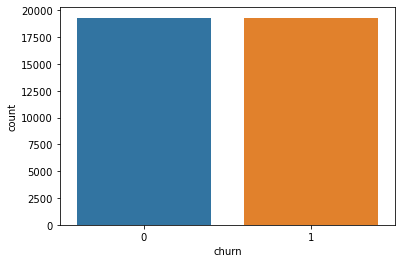

In [353]:
X_train, y_train = sm.fit_sample(X_train, y_train)
sns.countplot(y_train)

In [354]:
y_train.value_counts()

1    19309
0    19309
Name: churn, dtype: int64

Now if we see both the value for Churn and Non-Churn are equal now. Previous it was highly non-churn data, now it is 
equally distributed using SMOTE.

### Using PCA for model building

In [245]:
pca = PCA()

In [246]:
pca.fit(X_train)

PCA()

#### Components from the PCA

In [247]:
pca.components_

array([[ 7.16652028e-02,  1.70343121e-01,  1.63347578e-01, ...,
        -6.71001725e-04,  3.64693744e-02,  1.37829708e-01],
       [ 1.66892327e-01, -1.95888247e-02,  6.70651529e-03, ...,
        -4.93246540e-02, -7.39767086e-03, -1.00321251e-01],
       [ 6.68672039e-02,  7.49037521e-02,  7.93304752e-02, ...,
         7.20619071e-03, -8.19797291e-02,  4.68986152e-02],
       ...,
       [ 0.00000000e+00, -4.54204691e-15,  1.69458019e-15, ...,
         1.78332801e-02,  1.21429401e-01,  1.03534091e-01],
       [-0.00000000e+00,  8.65651671e-16,  1.79472641e-15, ...,
        -7.27374456e-02,  7.19348327e-02,  1.46419880e-02],
       [ 0.00000000e+00, -1.18741822e-15, -1.66195552e-15, ...,
        -3.57234900e-02, -7.61323632e-03, -6.06912792e-02]])

#### Looking at the explained variance ratio for each component

In [248]:
pca.explained_variance_ratio_

array([1.09815136e-01, 9.32411869e-02, 6.52578582e-02, 5.30596116e-02,
       5.09011110e-02, 3.85146567e-02, 3.42539733e-02, 3.30590164e-02,
       2.70576806e-02, 2.35343029e-02, 2.22723935e-02, 2.07719298e-02,
       1.93241783e-02, 1.65304176e-02, 1.50683664e-02, 1.46758994e-02,
       1.45626409e-02, 1.42567206e-02, 1.37854526e-02, 1.33670688e-02,
       1.28036724e-02, 1.19520228e-02, 1.12699801e-02, 1.07266838e-02,
       1.03285062e-02, 9.75004062e-03, 9.01760165e-03, 8.71795616e-03,
       8.57155176e-03, 8.14726094e-03, 7.83286023e-03, 7.46902142e-03,
       6.99776846e-03, 6.86631009e-03, 6.53517471e-03, 6.21945855e-03,
       5.92355213e-03, 5.89648247e-03, 5.75088769e-03, 5.44337736e-03,
       5.24110717e-03, 5.10243433e-03, 4.91459553e-03, 4.74065643e-03,
       4.62963067e-03, 4.37683989e-03, 4.24515485e-03, 4.17148560e-03,
       4.04785392e-03, 3.85799531e-03, 3.66744710e-03, 3.49174441e-03,
       3.47278688e-03, 3.36277364e-03, 3.15848233e-03, 3.13318748e-03,
      

Making a scree plot for the explained variance.

In [249]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

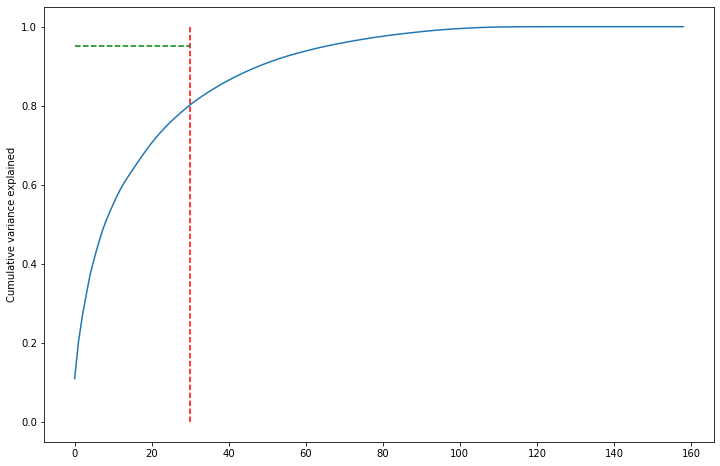

In [250]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

By above figure we can say that the components needs to be 30.

In [251]:
pca_final = IncrementalPCA(n_components=30)

In [252]:
#fitting the PCA into X_train data
telecom_train_pca = pca_final.fit_transform(X_train)

In [253]:
telecom_train_pca.shape

(38618, 30)

In [254]:
corrmat = np.corrcoef(telecom_train_pca.transpose())

In [255]:
corrmat.shape

(30, 30)

Plotting heatmap for the correlation matrix.

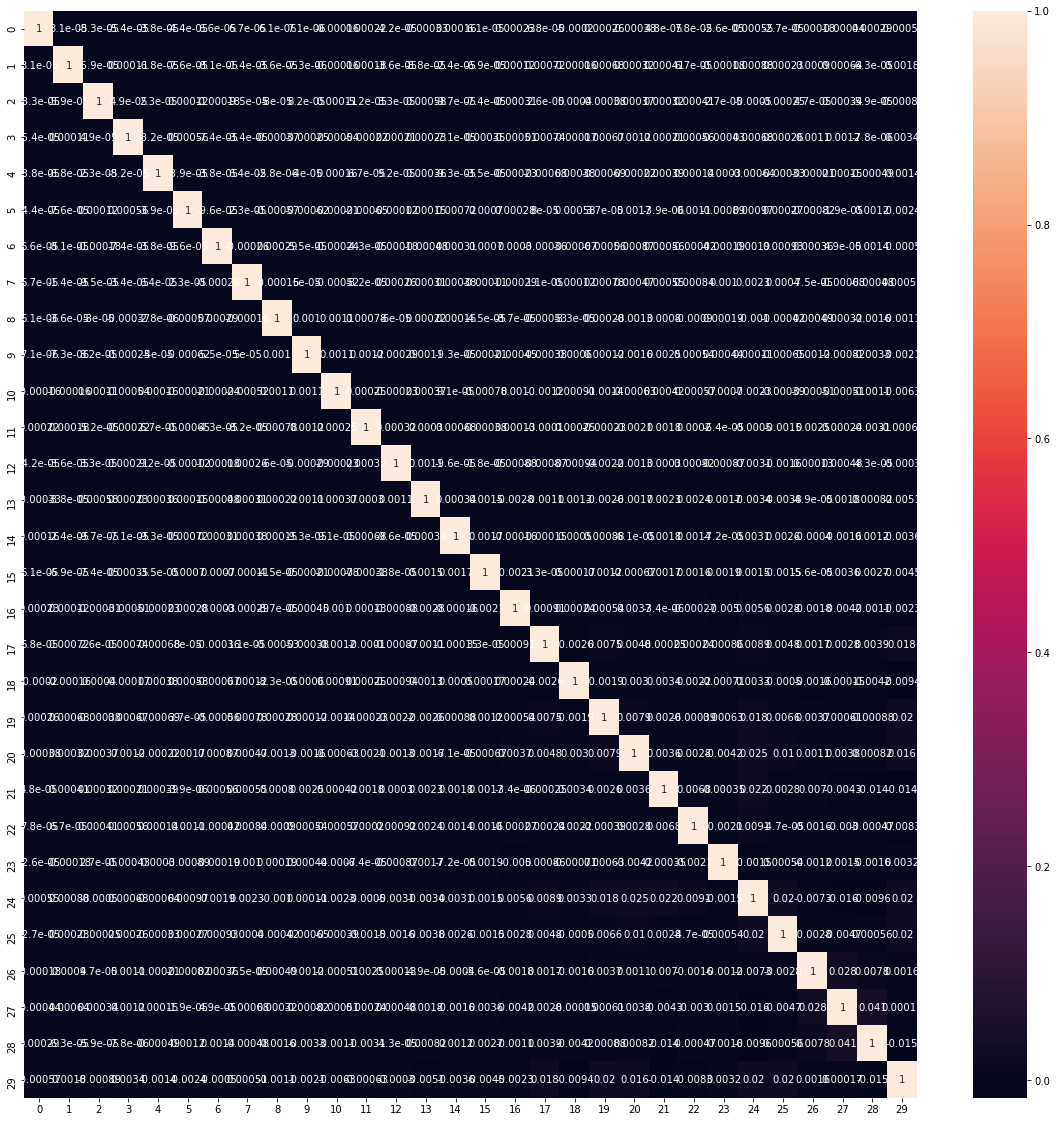

In [256]:
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set. 

In [257]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [258]:
telecom_test_pca = pca_final.transform(X_test)
telecom_test_pca.shape

(9001, 30)

### Applying Logistic Regression on the data on our Principal components

In [259]:
learner_pca = LogisticRegression()

In [260]:
model_pca = learner_pca.fit(telecom_train_pca, y_train)

In [261]:
y_pred = model_pca.predict_proba(telecom_test_pca)
y_pred_df = pd.DataFrame(y_pred)
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.head()

,1
0,0.741975
1,0.500728
2,0.109310
3,0.404491
4,0.615770


In [262]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
20296,1
8279,1
72269,0
65602,0
42758,1


In [263]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,20296,1,0.741975
1,8279,1,0.500728
2,72269,0,0.109310
3,65602,0,0.404491
4,42758,1,0.615770


In [264]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_final['predicted'] = pd.to_numeric(y_pred_final['predicted'])
y_pred_final['churn'] = pd.to_numeric(y_pred_final['churn'])
# Let's see the head
y_pred_final.head()

,CustID,churn,Churn_Prob,predicted
0,20296,1,0.741975,1
1,8279,1,0.500728,1
2,72269,0,0.109310,0
3,65602,0,0.404491,0
4,42758,1,0.615770,1


In [265]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6669, 1582],
       [ 130,  620]])

In [266]:
#Accuracy Score
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8097989112320854

In [267]:
#Recall Score
metrics.recall_score(y_pred_final.churn, y_pred_final.predicted)

0.8266666666666667

Recall tells us the accurate Churner which is 82%.

In [268]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [269]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn, y_pred_final.Churn_Prob, drop_intermediate = False )

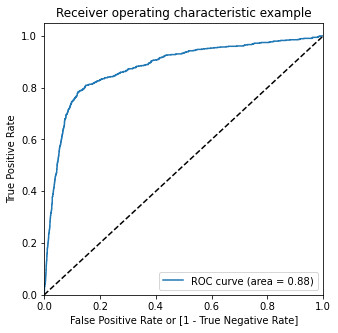

In [270]:
draw_roc(y_pred_final.churn, y_pred_final.Churn_Prob)

In [271]:
#ROC AUC score
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred[:,1]))

'0.88'

### Applying SVM on the data on our Principal components

In [75]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(telecom_train_pca, y_train)

SVC(kernel='linear')

In [272]:
y_pred = svclassifier.predict(telecom_test_pca)

In [273]:
#Confusion Matrix
print(metrics.confusion_matrix(y_test,y_pred))

[[6682 1569]
 [ 150  600]]


In [274]:
#Accuracy Score
print(metrics.accuracy_score(y_test,y_pred))

0.8090212198644595


In [275]:
#Recall Score
print(metrics.recall_score(y_test,y_pred))

0.8


This SVM model have the Churner accuracy 80%.

### Applying Random Forest on the data on our Principal components

In [276]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [277]:
# fit
rfc.fit(telecom_train_pca, y_train)

RandomForestClassifier()

In [278]:
# Making predictions
predictions = rfc.predict(telecom_test_pca)

In [279]:
#Confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[7702  549]
 [ 305  445]]


In [280]:
#Accuracy score
print(metrics.accuracy_score(y_test,predictions))

0.90512165314965


In [281]:
#Recall Score
print(metrics.recall_score(y_test,predictions))

0.5933333333333334


This Random Forest model have the Churner Accuracy 59%.

### Building the Logistic Regression model without PCA 

In [355]:
# Creating lr, an object of logistic regression with the parameter class_weight as the dataset is imbalanced
lr = LogisticRegression(class_weight='balanced')

### Feature Selection using RFE

In [518]:
# Running RFE with the output number of the variable equal to 20
rfe = RFE(lr, 20)
rfe = rfe.fit(X_train, y_train)

In [519]:
# ranking of the columns after applying rfe to the dataset
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 93),
 ('onnet_mou_7', False, 70),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 23),
 ('offnet_mou_7', False, 18),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 123),
 ('roam_ic_mou_7', False, 117),
 ('roam_ic_mou_8', False, 66),
 ('roam_og_mou_6', False, 25),
 ('roam_og_mou_7', False, 19),
 ('roam_og_mou_8', False, 14),
 ('loc_og_t2t_mou_6', False, 90),
 ('loc_og_t2t_mou_7', False, 63),
 ('loc_og_t2t_mou_8', False, 37),
 ('loc_og_t2m_mou_6', False, 24),
 ('loc_og_t2m_mou_7', False, 22),
 ('loc_og_t2m_mou_8', False, 41),
 ('loc_og_t2f_mou_6', False, 78),
 ('loc_og_t2f_mou_7', False, 106),
 ('loc_og_t2f_mou_8', False, 121),
 ('loc_og_t2c_mou_6', False, 72),
 ('loc_og_t2c_mou_7', False, 101),
 ('loc_og_t2c_mou_8', False, 100),
 ('loc_og_mou_6', False, 118),
 ('loc_og_mou_7', False, 112),
 ('loc_og_mou_8', False, 35),
 ('std_og_t2t_mou_6', False, 89),
 ('std_og_t2t_mou_7', False, 17),
 ('std_og_t2t_mou_8', False, 67),
 ('std_og_t

In [520]:
# creating a list col of the top 15 columns obtained after applying rfe
col = X_train.columns[rfe.support_]
col

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_amt_8', 'max_rech_data_8',
       'count_rech_2g_8', 'vol_2g_mb_8', 'total_ic_8', 'total_og_8',
       'total_ic_diff', 'total_og_diff'],
      dtype='object')

In [521]:
from statsmodels.api import add_constant

# adding a constant to the dataset as statsmodel requires a constant to be added
X_train_sm = sm.add_constant(X_train[col])
# creating logm, an object of GLM and fitting the data
logm1 = sm.GLM(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38597
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14200.
Date:                Mon, 30 Nov 2020   Deviance:                       28401.
Time:                        21:21:03   Pearson chi2:                 9.01e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.8016      0.027    -65.674      0.000      -1.855      -1.748
arpu_8               0.7420      0.071     10.424      0.000       0.603       0.882
onnet_mou_8          0.6868      0.479      1.435      0.151      -0.251       1.625
offnet_mou_8         0.5578      0.501      1.114      0.265      -0.424       1.540
std_og_mou_8         1.3291      0.084     15.756      0.000       1.164       1.494
total_og_mou_8      -3.6062      1.404     -2.569      0.010      -6.357      -0.855
loc_ic_t2t_mou_8     0.8768      0.194      4.519      0.000       0.497       1.257
loc_ic_t2m_mou_8     1.3481      0.255      5.294      0.000       0.849       1.847
loc_ic_mou_8         4.9901      0.368     13.572      0.000       4.269       5.711
std_ic_mou_8         3.1981      0.110     29.032      0.000       2.982       3.414
total_ic_mou_6      -0.8877      0.067    -13.156      0.000      -1.020      -0.755
total_ic_mou_8      -9.5989      0.300    -32.009      0.000     -10.187      -9.011
isd_ic_mou_8         1.7176      0.051     33.372      0.000       1.617       1.818
total_rech_amt_8    -0.8532      0.074    -11.562      0.000      -0.998      -0.709
max_rech_data_8     -0.7529      0.023    -32.261      0.000      -0.799      -0.707
count_rech_2g_8     -0.5789      0.029    -19.947      0.000      -0.636      -0.522
vol_2g_mb_8         -0.4345      0.041    -10.517      0.000      -0.515      -0.353
total_ic_8           1.2708      0.228      5.562      0.000       0.823       1.719
total_og_8           0.9054      2.117      0.428      0.669      -3.243       5.054
total_ic_diff        0.9819      0.053     18.638      0.000       0.879       1.085
total_og_diff        0.4796      0.018     26.631      0.000       0.444       0.515
====================================================================================
"""

In [522]:
col = col.tolist()
col.remove('offnet_mou_8')

In [523]:
# Checking the VIF values of the model columns by creating a vif dataframe,then rounding and sorting them in descending order
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,total_og_8,269.27
3,total_og_mou_8,267.77
15,total_ic_8,124.39
9,total_ic_mou_8,106.70
6,loc_ic_mou_8,101.82
5,loc_ic_t2m_mou_8,36.36
4,loc_ic_t2t_mou_8,17.35
0,arpu_8,16.04
11,total_rech_amt_8,15.24
7,std_ic_mou_8,11.17


In [524]:
#removing total_og_mou_8 because it have very high VIF.
col.remove('total_og_8')

In [525]:
# adding a constant to the dataset as statsmodel requires a constant to be added
X_train_sm = sm.add_constant(X_train[col])
# creating logm, an object of GLM and fitting the data
logm1 = sm.GLM(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38599
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14241.
Date:                Mon, 30 Nov 2020   Deviance:                       28482.
Time:                        21:21:27   Pearson chi2:                 9.62e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.8112      0.028    -65.671      0.000      -1.865      -1.757
arpu_8               0.8136      0.073     11.173      0.000       0.671       0.956
onnet_mou_8          0.2058      0.030      6.960      0.000       0.148       0.264
std_og_mou_8         1.3595      0.085     16.013      0.000       1.193       1.526
total_og_mou_8      -2.0161      0.099    -20.389      0.000      -2.210      -1.822
loc_ic_t2t_mou_8     0.9003      0.195      4.610      0.000       0.518       1.283
loc_ic_t2m_mou_8     1.3874      0.256      5.413      0.000       0.885       1.890
loc_ic_mou_8         5.2163      0.371     14.067      0.000       4.490       5.943
std_ic_mou_8         3.3280      0.111     29.946      0.000       3.110       3.546
total_ic_mou_6      -0.9260      0.068    -13.672      0.000      -1.059      -0.793
total_ic_mou_8     -11.0477      0.256    -43.183      0.000     -11.549     -10.546
isd_ic_mou_8         1.8381      0.049     37.562      0.000       1.742       1.934
total_rech_amt_8    -0.8054      0.074    -10.913      0.000      -0.950      -0.661
max_rech_data_8     -0.7739      0.023    -33.258      0.000      -0.819      -0.728
count_rech_2g_8     -0.5849      0.029    -20.184      0.000      -0.642      -0.528
vol_2g_mb_8         -0.4367      0.041    -10.548      0.000      -0.518      -0.356
total_ic_8           2.3674      0.231     10.237      0.000       1.914       2.821
total_ic_diff        1.0126      0.053     19.087      0.000       0.909       1.117
total_og_diff        0.4855      0.018     26.984      0.000       0.450       0.521
====================================================================================
"""

In [526]:
# Checking the VIF values of the model columns by creating a vif dataframe,then rounding and sorting them in descending order
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,total_ic_8,103.76
6,loc_ic_mou_8,100.56
9,total_ic_mou_8,68.38
5,loc_ic_t2m_mou_8,36.36
4,loc_ic_t2t_mou_8,17.35
0,arpu_8,15.93
11,total_rech_amt_8,15.22
7,std_ic_mou_8,10.90
8,total_ic_mou_6,9.48
3,total_og_mou_8,9.18


In [527]:
col.remove('total_ic_8')

In [528]:
# adding a constant to the dataset as statsmodel requires a constant to be added
X_train_sm = sm.add_constant(X_train[col])
# creating logm, an object of GLM and fitting the data
logm1 = sm.GLM(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38600
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14314.
Date:                Mon, 30 Nov 2020   Deviance:                       28629.
Time:                        21:21:45   Pearson chi2:                 1.04e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.8117      0.028    -65.726      0.000      -1.866      -1.758
arpu_8               0.8736      0.073     11.894      0.000       0.730       1.017
onnet_mou_8          0.2371      0.030      7.899      0.000       0.178       0.296
std_og_mou_8         1.4185      0.086     16.483      0.000       1.250       1.587
total_og_mou_8      -2.1935      0.099    -22.080      0.000      -2.388      -1.999
loc_ic_t2t_mou_8     0.9145      0.197      4.645      0.000       0.529       1.300
loc_ic_t2m_mou_8     1.4173      0.258      5.484      0.000       0.911       1.924
loc_ic_mou_8         6.2080      0.359     17.315      0.000       5.505       6.911
std_ic_mou_8         3.8371      0.099     38.922      0.000       3.644       4.030
total_ic_mou_6      -0.7804      0.066    -11.780      0.000      -0.910      -0.651
total_ic_mou_8     -10.0064      0.235    -42.637      0.000     -10.466      -9.546
isd_ic_mou_8         1.9069      0.048     39.398      0.000       1.812       2.002
total_rech_amt_8    -0.7454      0.074    -10.072      0.000      -0.890      -0.600
max_rech_data_8     -0.7960      0.023    -34.486      0.000      -0.841      -0.751
count_rech_2g_8     -0.6002      0.029    -20.784      0.000      -0.657      -0.544
vol_2g_mb_8         -0.4283      0.041    -10.451      0.000      -0.509      -0.348
total_ic_diff        0.9026      0.052     17.448      0.000       0.801       1.004
total_og_diff        0.4960      0.018     27.551      0.000       0.461       0.531
====================================================================================
"""

In [529]:
# Checking the VIF values of the model columns by creating a vif dataframe,then rounding and sorting them in descending order
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_ic_mou_8,81.87
9,total_ic_mou_8,44.81
5,loc_ic_t2m_mou_8,36.36
4,loc_ic_t2t_mou_8,17.34
0,arpu_8,15.90
11,total_rech_amt_8,15.20
8,total_ic_mou_6,9.38
3,total_og_mou_8,9.03
7,std_ic_mou_8,7.08
15,total_ic_diff,6.56


In [530]:
col.remove('loc_ic_mou_8')

In [531]:
# adding a constant to the dataset as statsmodel requires a constant to be added
X_train_sm = sm.add_constant(X_train[col])
# creating logm, an object of GLM and fitting the data
logm1 = sm.GLM(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38601
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14439.
Date:                Mon, 30 Nov 2020   Deviance:                       28878.
Time:                        21:22:03   Pearson chi2:                 9.40e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9188      0.027    -70.017      0.000      -1.972      -1.865
arpu_8               0.9129      0.074     12.305      0.000       0.767       1.058
onnet_mou_8          0.2497      0.030      8.273      0.000       0.191       0.309
std_og_mou_8         1.4255      0.086     16.614      0.000       1.257       1.594
total_og_mou_8      -2.2409      0.099    -22.650      0.000      -2.435      -2.047
loc_ic_t2t_mou_8     4.0484      0.115     35.342      0.000       3.824       4.273
loc_ic_t2m_mou_8     5.6866      0.136     41.817      0.000       5.420       5.953
std_ic_mou_8         3.6999      0.093     39.699      0.000       3.517       3.883
total_ic_mou_6      -0.7139      0.065    -10.917      0.000      -0.842      -0.586
total_ic_mou_8      -9.6728      0.219    -44.179      0.000     -10.102      -9.244
isd_ic_mou_8         1.8373      0.046     39.910      0.000       1.747       1.928
total_rech_amt_8    -0.8048      0.075    -10.758      0.000      -0.951      -0.658
max_rech_data_8     -0.7498      0.022    -33.537      0.000      -0.794      -0.706
count_rech_2g_8     -0.6223      0.029    -21.520      0.000      -0.679      -0.566
vol_2g_mb_8         -0.4521      0.041    -11.068      0.000      -0.532      -0.372
total_ic_diff        0.8606      0.051     16.838      0.000       0.760       0.961
total_og_diff        0.4807      0.018     26.826      0.000       0.446       0.516
====================================================================================
"""

In [532]:
# Checking the VIF values of the model columns by creating a vif dataframe,then rounding and sorting them in descending order
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_ic_mou_8,37.54
0,arpu_8,15.87
10,total_rech_amt_8,15.20
5,loc_ic_t2m_mou_8,13.91
7,total_ic_mou_6,9.07
3,total_og_mou_8,8.95
4,loc_ic_t2t_mou_8,7.19
14,total_ic_diff,6.41
6,std_ic_mou_8,5.84
2,std_og_mou_8,5.56


In [533]:
col.remove('total_ic_mou_8')

In [534]:
# Checking the VIF values of the model columns by creating a vif dataframe,then rounding and sorting them in descending order
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,15.76
9,total_rech_amt_8,15.18
7,total_ic_mou_6,8.66
3,total_og_mou_8,8.52
13,total_ic_diff,6.13
2,std_og_mou_8,5.45
5,loc_ic_t2m_mou_8,3.86
4,loc_ic_t2t_mou_8,2.29
1,onnet_mou_8,2.28
6,std_ic_mou_8,1.91


In [535]:
col.remove('arpu_8')

In [536]:
# Checking the VIF values of the model columns by creating a vif dataframe,then rounding and sorting them in descending order
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_ic_mou_6,8.66
2,total_og_mou_8,8.38
12,total_ic_diff,6.13
1,std_og_mou_8,5.43
4,loc_ic_t2m_mou_8,3.86
3,loc_ic_t2t_mou_8,2.29
0,onnet_mou_8,2.28
8,total_rech_amt_8,1.92
5,std_ic_mou_8,1.91
13,total_og_diff,1.41


In [537]:
col.remove('total_ic_mou_6')

In [538]:
# Checking the VIF values of the model columns by creating a vif dataframe,then rounding and sorting them in descending order
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_og_mou_8,8.37
1,std_og_mou_8,5.42
0,onnet_mou_8,2.28
7,total_rech_amt_8,1.92
4,loc_ic_t2m_mou_8,1.47
12,total_og_diff,1.41
8,max_rech_data_8,1.27
10,vol_2g_mb_8,1.23
11,total_ic_diff,1.20
9,count_rech_2g_8,1.19


In [539]:
col.remove('total_og_mou_8')

In [540]:
# Checking the VIF values of the model columns by creating a vif dataframe,then rounding and sorting them in descending order
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,std_og_mou_8,2.15
0,onnet_mou_8,1.92
6,total_rech_amt_8,1.64
11,total_og_diff,1.39
7,max_rech_data_8,1.27
3,loc_ic_t2m_mou_8,1.25
9,vol_2g_mb_8,1.23
10,total_ic_diff,1.20
8,count_rech_2g_8,1.19
2,loc_ic_t2t_mou_8,1.15


In [541]:
# adding a constant to the dataset as statsmodel requires a constant to be added
X_train_sm = sm.add_constant(X_train[col])
# creating logm, an object of GLM and fitting the data
logm1 = sm.GLM(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38605
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17465.
Date:                Mon, 30 Nov 2020   Deviance:                       34931.
Time:                        21:23:20   Pearson chi2:                 8.88e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5332      0.024    -62.680      0.000      -1.581      -1.485
onnet_mou_8          0.1478      0.027      5.519      0.000       0.095       0.200
std_og_mou_8        -0.3352      0.030    -11.125      0.000      -0.394      -0.276
loc_ic_t2t_mou_8    -1.1836      0.063    -18.798      0.000      -1.307      -1.060
loc_ic_t2m_mou_8    -1.0146      0.039    -26.214      0.000      -1.090      -0.939
std_ic_mou_8        -0.3654      0.035    -10.412      0.000      -0.434      -0.297
isd_ic_mou_8        -0.0864      0.025     -3.476      0.001      -0.135      -0.038
total_rech_amt_8    -0.8051      0.031    -26.294      0.000      -0.865      -0.745
max_rech_data_8     -0.5146      0.021    -24.794      0.000      -0.555      -0.474
count_rech_2g_8     -0.9092      0.031    -29.435      0.000      -0.970      -0.849
vol_2g_mb_8         -0.6303      0.042    -14.850      0.000      -0.713      -0.547
total_ic_diff        0.2835      0.020     14.054      0.000       0.244       0.323
total_og_diff        0.3912      0.017     23.549      0.000       0.359       0.424
====================================================================================
"""

In [542]:
# model building using the remaining columns
model_lrm = lr.fit(X_train[col], y_train)

In [543]:
# y_pred: probabilities of occurence of 0 and 1
y_pred = model_lrm.predict_proba(X_test[col])
# converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)
# dataframe y_pred_1 consisting of only the probability of occurence of 1
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.head()

,1
0,2.186859e-99
1,8.394522e-72
2,0.000000e+00
3,2.134553e-177
4,1.000000e+00


In [544]:
# converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
20296,1
8279,1
72269,0
65602,0
42758,1


In [545]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','churn','churn_prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,ID,churn,churn_prob
0,20296,1,2.186859e-99
1,8279,1,8.394522e-72
2,72269,0,0.000000e+00
3,65602,0,2.134553e-177
4,42758,1,1.000000e+00


In [546]:
# creating the predictions columns where all probs greater than 0.5 are predicted as 1 and probabs below 0.5 are predicted as 0
y_pred_final['predicted'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)
# converting the predicted and churn columns to numeric type columns
y_pred_final['predicted'] = pd.to_numeric(y_pred_final['predicted'])
y_pred_final['churn'] = pd.to_numeric(y_pred_final['churn'])
# Let's see the head
y_pred_final.head()

,ID,churn,churn_prob,predicted
0,20296,1,2.186859e-99,0
1,8279,1,8.394522e-72,0
2,72269,0,0.000000e+00,0
3,65602,0,2.134553e-177,0
4,42758,1,1.000000e+00,1


In [547]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[7437,  814],
       [ 276,  474]])

In [548]:
# accuracy
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8789023441839796

In [549]:
#recall
metrics.recall_score(y_pred_final.churn, y_pred_final.predicted)

0.632

This Logistic Regression model have Churner accuracy 63%

In [550]:
# auc score
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred[:,1]))

'0.83'

In [551]:
# function to plot roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [552]:
# calculating fpr, tpr and thresholds
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn, y_pred_final.churn_prob, drop_intermediate = False )

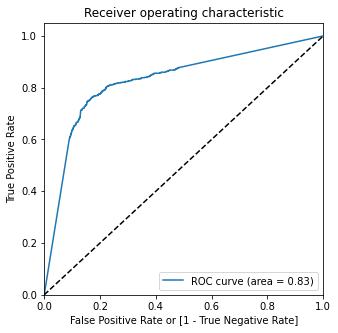

In [553]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

### Insights

In [554]:
#calculating the lasso regression coefficients and intercept
feature_coeff = list(model_lrm.coef_[0])
feature_coeff.insert(0, model_lrm.intercept_[0])
feature_coeff = [np.round(x, 3) for x in feature_coeff]
col = X_train[col].columns
col = col.insert(0, "constant")
sorted(list(zip(col, feature_coeff)), key = lambda x:x[1], reverse = True)

[('total_og_diff', 0.391),
 ('total_ic_diff', 0.283),
 ('onnet_mou_8', 0.147),
 ('isd_ic_mou_8', -0.086),
 ('std_og_mou_8', -0.335),
 ('std_ic_mou_8', -0.365),
 ('max_rech_data_8', -0.515),
 ('vol_2g_mb_8', -0.629),
 ('total_rech_amt_8', -0.805),
 ('count_rech_2g_8', -0.908),
 ('loc_ic_t2m_mou_8', -1.014),
 ('loc_ic_t2t_mou_8', -1.18),
 ('constant', -1.532)]

### Important Predictors
- total_og_diff
- total_ic_diff
- onnet_mou_8
- isd_ic_mou_8
- max_rech_data_8
- std_ic_mou_8
- std_og_mou_8
- vol_2g_mb_8
- total_rech_amt_8
- count_rech_2g_8
- loc_ic_t2t_mou_8
- loc_ic_t2m_mou_8

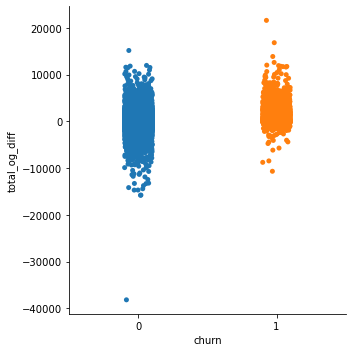

In [556]:
sns.catplot(x="churn", y='total_og_diff', data=telecom)

From the above plot it is evident that customers who have total outgoing call differnce between -2000 to 10000 have a higher chance to churn.

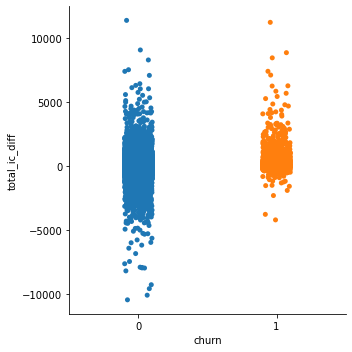

In [569]:
sns.catplot(x="churn", y='total_ic_diff', data=telecom)

From the above plot it is evident that customers who have total incoming call differnce between 0-5000 have a higher chance to churn.

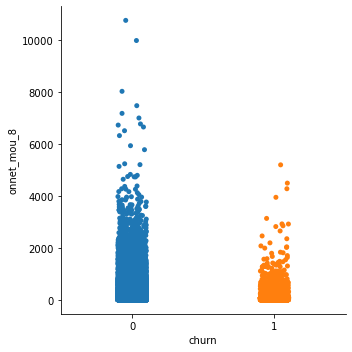

In [570]:
sns.catplot(x="churn", y='onnet_mou_8', data=telecom)

From the above plot it is evident that customers who have all kind of call having same operator for 8th month less than 2000 minutes of usage have a higher chance to churn.

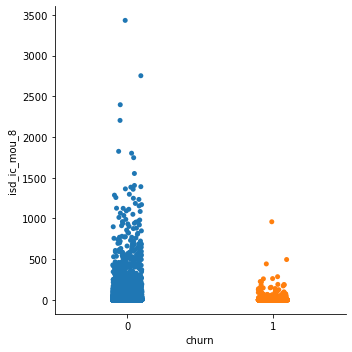

In [571]:
sns.catplot(x="churn", y='isd_ic_mou_8', data=telecom)

From the above plot it is evident that customers who have ISD incoming call of 8th month having less than 300 minutes of usage have a higher chance to churn.

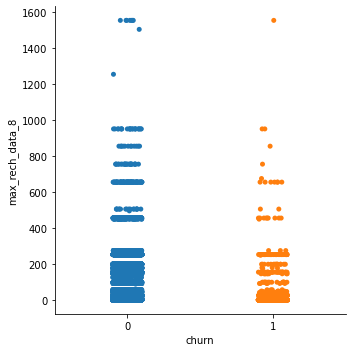

In [572]:
sns.catplot(x="churn", y='max_rech_data_8', data=telecom)

From the above plot it is evident that customers who have Maximum recharge data for 8th month less than 200 have a higher chance to churn.

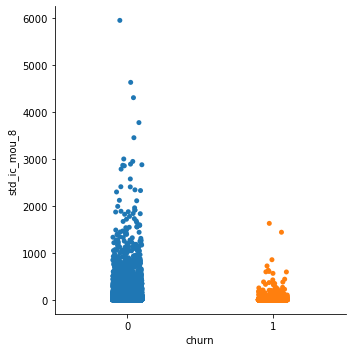

In [573]:
sns.catplot(x="churn", y='std_ic_mou_8', data=telecom)

From the above plot it is evident that customers who have STD incoming call for 8th month having less than 500 minutes of usage have a higher chance to churn.

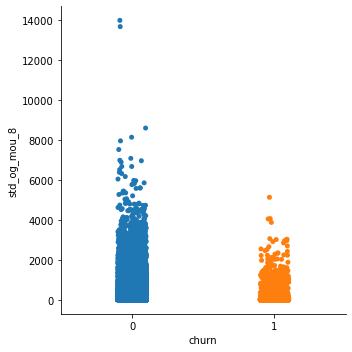

In [574]:
sns.catplot(x="churn", y='std_og_mou_8', data=telecom)

From the above plot it is evident that customers who have STD outgoing call for 8th month having less than 2000 minutes of usage have a higher chance to churn.

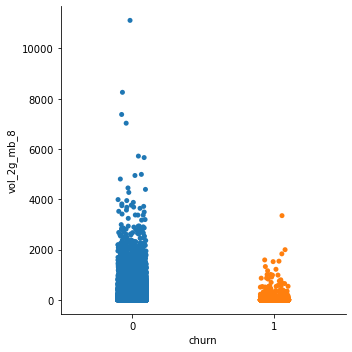

In [575]:
sns.catplot(x="churn", y='vol_2g_mb_8', data=telecom)

From the above plot it is evident that customers who have mobile internet usage for the 8th month 1000 mb have a higher chance to churn.

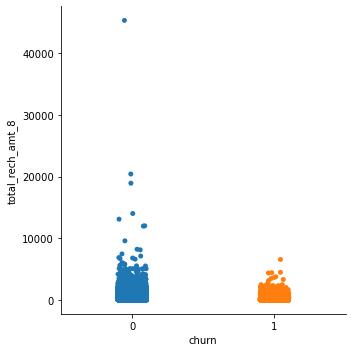

In [576]:
sns.catplot(x="churn", y='total_rech_amt_8', data=telecom)

From the above plot it is evident that customers total recharge amount less than 3000 rupee for 8th month have a higher chance to churn.

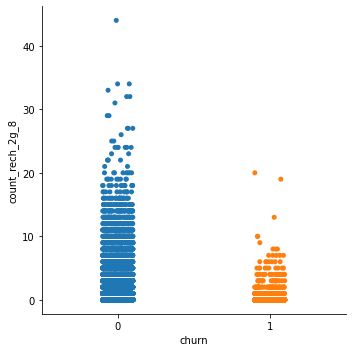

In [577]:
sns.catplot(x="churn", y='count_rech_2g_8', data=telecom)

From the above plot it is evident that customers counting recharge of 2g for 8th month less than 8 have a higher chance to churn.

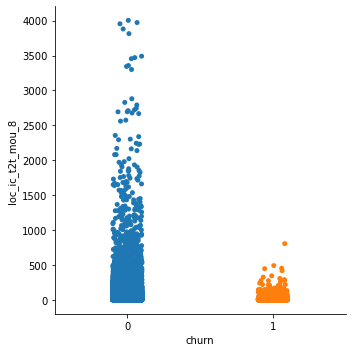

In [578]:
sns.catplot(x="churn", y='loc_ic_t2t_mou_8', data=telecom)

From the above plot it is evident that customers who have local incoming call within same operator having less than 500 minute usage have a higher chance to churn.

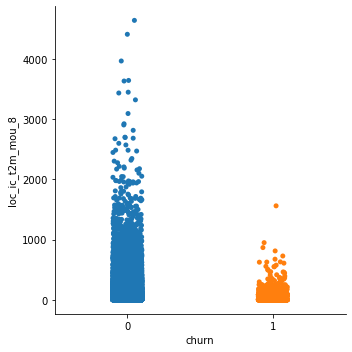

In [579]:
sns.catplot(x="churn", y='loc_ic_t2m_mou_8', data=telecom)

From the above plot it is evident that customers who have local incoming call operator T to other operator mobile having less than 500 minute usage have a higher chance to churn.

## Customers that have higher risk of churn are those who:
- Total outgoing call differnce between -2000 - 10000.
- Total incoming call differnce between 0-5000.
- All kind of call having same operator for 8th month less than 2000 minutes of usage.
- ISD incoming call of 8th month having less than 300 minutes of usage.
- Maximum recharge data for 8th month less than 200.
- STD incoming call for 8th month having less than 500 minutes of usage.
- STD outgoing call for 8th month having less than 2000 minutes of usage.
- Mobile internet usage for the 8th month 1000 mb.
- Total recharge amount less than 3000 rupee for 8th month.
- Counting recharge of 2g for 8th month less than 8.
- Local incoming call within same operator having less than 500 minute usage.
- Local incoming call operator T to other operator mobile having less than 500 minute usage.


## Statergies to manage Churn customer
- If we look our model which we built, indicate that the 8th month where the customer experience starts sore and more number of churn action is taking place in this month, so it is higly recommended to give Customera a highly festive discount in this month because it is where the festive season start. So that the customers get happy with that discount and they dont churn to another opera